# Assignmet 4 - Answer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. if instructions are not given, make any assumption you like

import csv file ../resources/company_sales_data.csv

use style seaborn-whitegrid

use subplots  (with any layout you like)

In [2]:
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("../resources/company_sales_data.csv")
#optional - for convenience
total_profit = df['total_profit']
month = df['month_number']
total_units = df['total_units']

FileNotFoundError: [Errno 2] File ../resources/company_sales_data.csv does not exist: '../resources/company_sales_data.csv'

1.1 subplot 1

plot with x as month number, and y as total profit with style circle markers and colored red

title = Company profit per month

put at least one ax/plt.text

x label = month

y label = total profit

#set the ylimit to 100000 to 450000

add guassian fitted line (does not require fill between)

1.2. subplot2

read each product sales and show it using a multiline plot

x label = month

y label = sales units in number

legend on upper center, with columns of 3, set fontsize to 9 using prop params

circle marker; linewidth=3

title = sales data

add one blue dotted line showing the average of all products, with text annotating "average"

1.3. subplot3

plot toothpaste sales data of each using scatter plot

use plt.grid(True, linestyle="--") to show some gridlines  (I did not teach but its not difficult)

x label = month

y label = number of units sold

title = tooth paste sales data

legend = best position

1.4. subplot4

plot bar chart comparing facecream and facewash product sales data

time to check out the documentation :)

since x is comparing two bars, you have to adjust the x slightly for both bars

x label = month

y label = number of units sold

title = facewash and facecream

legend = upper center, column of 2

put some gridlines for easy comparison

to add some flavor, overlay the average of all products on this plot, so we know facecream and facewash is not doing very well!

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

#subplot 1
ax1 = ax[0, 0]
ax1.plot(month, total_profit, 'or')

from sklearn.gaussian_process import GaussianProcessRegressor as GP
gp = GP().fit(month[:, np.newaxis], total_profit)

xfit = np.linspace(1, 12, 1000)
yfit = gp.predict(xfit[:, np.newaxis])

# Visualize the result
ax1.plot(xfit, yfit, '-', color='gray')   #fitted by guassian

ax1.title.set_text("Company profit per month")
ax1.set_ylabel("sold units")
ax1.set_ylim(100000, 450000)
ax1.set_xticks(month)  #set one time will influence others since sharex=True

ax1.annotate('market realization', xy=(6.2, 220000), xytext=(3, 400000),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))

#subplot2
ax2 = ax[0, 1]
ax2.set_ylabel("sales units in number")
ax2.title.set_text("Sales data")
for col in df.columns[1:-2]:
    ax2.plot(month, df[col], marker='o', linewidth=3, label=col)
ax2.legend(loc='upper center', ncol=3, prop={'size': 9})

average = df[df.columns[1:-2]].mean(axis=1)
ax2.plot(month, average, 'm--')
ax2.text(10, 5000, "Average", color="magenta")

#subplot3
ax3 = ax[1, 0]
ax3.scatter(month, df['toothpaste'], label="Tooth paste sales")
ax3.grid(True, linewidth= 1, linestyle="--")
ax3.set_ylabel("number of units sold")
ax3.title.set_text("Tooth paste sales data")
ax3.legend(loc='best')
ax3.set_xlabel("month")

#subplot4
ax4 = ax[1, 1]
ax4.bar([a - 0.25 for a in month], df['facecream'], width= 0.25, label = 'Face Cream sales data', align='edge')
ax4.bar([a for a in month], df['facewash'], width= 0.25, label = 'Face Wash sales data', align='edge')
ax4.set_ylabel('Sales units in number')
ax4.legend(loc='upper center', ncol=2)
ax4.title.set_text('Facewash and facecream')
ax4.grid(True, linewidth= 1, linestyle="--")
ax4.plot(month, average, 'm--')
ax4.text(4, 4000, "Average of all prods.", color="magenta")
ax4.set_xlabel("month")

2. Continue from above


Create a separate histogram plot showing distribution of profit range with this range profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]

In [ ]:
plt.figure(figsize = (10, 5))
profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]
plt.hist(df['total_profit'], profit_range, label = 'Profit data')
plt.xlabel('profit range in dollar')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xticks(profit_range)
plt.title('Profit data')

3. let's try to perform a linear regression on the profit, with x = month and y = total profit

plot the actual values using scatter

plot the fitted line, along with error bar where yerr = yactual - ypred

instead of using gp, use sckitlearn.LinearRegression

last, print the R^2 with 3 significant digits (e.g., 0.502)and write it on any place on the graph

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

y = df['total_profit']
X = df['month_number'].values.reshape((len(df), 1)) #.values access the underlying numpy to allow for reshaping to (samples, features) shape

reg = LR().fit(X, total_profit)
y_preds = reg.predict(X)

plt.text(1.5, 450000, f"$R^2$ = {r2_score(y, y_preds):.3f}")

plt.scatter(X, y, color='black')
plt.plot(X, y_preds)
plt.errorbar(X, y, yerr=y-y_preds, fmt='.r')

4.  Apply K means library from sklearn with n_clusters=4, and plot a scatter plot with colors based on their grouping.
also plot the centers using cluster_centers_

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=3, random_state=42)

# Your code here

#let's make a simple plot first
print("Simple plot")
plt.scatter(X[:, 0], X[:, 1])
plt.show()  #if it is not the last command, use plt.show() to explicitly show the diagram

#let's do some kmean clustering (I did not teach yet what is this, but basically is a unsupervised
#algorithm for perform clustering (grouping))
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_  #return x y coordinates of n_clusters center. (here the shape is 3 , 2)

print("Plot applying kmeans")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='spring')
plt.scatter(centers[:, 0], centers[:, 1], c='gray', s=100, alpha=0.8)

5. apply ridge regression with degrees, 1 to 5 and plot using these x and f(x)

print their r^2 on the graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.linspace(0, 10, 30)
X = x[:, np.newaxis]
y = x**2 * np.cos(x) + 105

# Your code here

plt.scatter(x, y, label="y actual")

for ix, deg in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(deg), Ridge())
    model.fit(X, y)
    y_preds = model.predict(X)
    plt.text(3, ix*10, f"$R^2$ = {model.score(X, y):.3f} (deg: {deg}) ")
    plt.plot(x, y_preds,label="deg %d" % deg)

plt.legend()

6. predit using LogisticRegression

to add some flavor, learn how to plot the decision boundary using plt.pcolormesh

in order to generate Z for input to plt.pcolormesh, use np.meshgrid which will generate all possible x and y

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]  #so this can be nicely plot using x1 and x2
y = iris.target  #a reminder that there are 3 classes, e.g., Versicolor

# Your code here

model = LogisticRegression().fit(X, y)

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  #0.01 indicates the resolution of how precise is our coloring
                     np.arange(y_min, y_max, 0.01))

# first ravel into a list of x and y coordinates, then use column_stack to pair all x and y, then predict
Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)  #put this back into xx shape
plt.pcolormesh(xx, yy, Z, cmap="viridis")  #use pcolormesh to plot the colormesh

#plot the actual points, with color specifying the actual y class
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolor='black', cmap="viridis")
plt.title("Logistic regression on iris dataset")

7. this one is simple, seaborn has a very useful pairplot function

first understand why pairplot is useful - write one or two short sentences

then attempt to apply pairplot with the iris dataset

reminder to check what pairplot accepts, so you can prepare the data in that correct format

you may also want to read what sklearn return for dataset

In [ ]:
import seaborn as sns
sklearn_dataset_to_pandas = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.pairplot(sklearn_dataset_to_pandas, kind="scatter", hue="target")


#pairplot is useful to examine relationships, before actually drilling to the data
#it is probably a golden rule, i.e., visualization and understanding the data will greatly increase 
#the chance of your success in applying ML.

#for example, we can see thaat speal length, petal length, and petal width have a clear distinct distribution
#with targets, indicating a good choice for features (X)

8. Make a scatter plot with histograms above and right of the scatter plot along with the cdf curve (Hint: use hist-type(step))

Next, find the correlation and p-value using pearson correlation, and print the results on the graph

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation
np.random.seed(42)
x = np.random.normal(mu, sigma, 1000)
y = np.random.randn(1000)

#pearson correlation
from scipy import stats
r, p = stats.pearsonr(x, y)

fig = plt.figure(figsize=(12,8))
grid = gs.GridSpec(4, 4)
main = plt.subplot(grid[1:4, :3])
tophist = plt.subplot(grid[0, :3], sharex=main)
righthist = plt.subplot(grid[1:4, 3:], sharey=main)

#main plot
main.scatter(x, y, marker='o')
main.set_xlabel("x")
main.set_ylabel("y")
main.text(-0.33, 2.8, f"pearson r: {r:.2f}")
main.text(-0.33, 2.6, f"p-value: {p:.2f}")

color='orangered'

#top plot
tophist.hist(x, bins=30)
tophist.set_ylabel('freq')
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/two_scales.html
topcdf = tophist.twinx()  #create new axes but share the same x axis
topcdf.hist(x,bins=100,cumulative=True,histtype='step',density=True,color=color)
#normalized hist using density set to True
topcdf.tick_params(axis='y', colors=color)
topcdf.set_ylabel('cdf',color=color)

#right plot
righthist.hist(y,bins=30,orientation='horizontal')
righthist.set_xlabel('freq')
rightcdf = righthist.twiny()  #create new axes but share the same y axis
#normalized hist using density set to True
rightcdf.hist(y,bins=100,cumulative=True,histtype='step',density=True,color=color,orientation='horizontal')
rightcdf.tick_params(axis='x', colors=color)
rightcdf.set_xlabel('cdf',color=color)

9. Boxplot is commonly used in academic settings due to its compact format but with abundant information

Attempt to create a boxplot of total_bills by days based on this dataset

to add some challenge, attempt to add a scatterplot on top of the boxplot

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')  #return pd dataframe

# Your code here

days = set(df['day']) 
print(days)  #possible days

dfs = []  #list of dataframe
for ix, day in enumerate(days):
    day_df = df.loc[df['day'] == day, 'total_bill']  #shape (n_samples, )
    #for boxplot later
    dfs.append(day_df)
    #plotting each scatterplot
    #adding some random jitter for nice plot
    x = np.random.normal(ix+1, 0.04, size=len(day_df))  #Sat = 1, Fri = 2, Sun = 3, Thur = 4
    plt.plot(x, day_df, 'r.', alpha=0.2)
    
plt.boxplot(dfs, labels=days)  #list of (n_samples)
plt.ylabel("Total Bill")

10. Common task is to initially compare machine learning algorithms as a spot checking process before fine-tuning hypteramaters

Here we gonna use boxplot to compare the algorithms based on accuracy

Note that there are many metrics you can use to compare algorithms, and not only accuracy that matters, e.g., time, learning curves, etc.

Also note that it is silly to consider this result done. This is simply an exploratory process to check which model is viable, before fine-tuning

- perform classification based on what we have imported
- then plot the results using boxplot

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# load dataset
digits = datasets.load_digits()

#perform classification based on what we have imported
#then plot the results using boxplot

# Your code here

#most distanced based algorithms benefit from normalizing with mean 0 and unit std
scaler = StandardScaler()
X = scaler.fit(digits.data).transform(digits.data)
y = digits.target

# print(X.shape)  #verify is (n_samples, n_features)
# print(y.shape)  #verify is (n_samples, )
# print("Possible y: ", set(y))  #possible y

# prepare models; I have put into a list so I can easily loop them
models = []
models.append(('LR', LogisticRegression(multi_class="multinomial",
                                       max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:  #e.g., name = LR, model = LogisticRegression()
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    #list of 10 results doing cross validation for each model
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
plt.boxplot(results, labels=names)
plt.title("Comparing basic algorithms on MNIST dataset")
plt.show()


11. Given two simple 2D vectors 'u' and 'v'. Represent them vectors as arrows.

In [ ]:
u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [ ]:
#represent these vectors as arrows

# Your code here

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

12. Given two simple 3D vectors 'a' and 'b'. Attempt to plot the 3d vectors

In [ ]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

In [ ]:
#attempt to plot the 3d vectors
# Your code here

def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

13. We have already seen that vectors can been represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$ matrix `P` and plot it as points:

In [ ]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

Of course we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $P$, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

In [ ]:
plt.plot(x_coords_P, y_coords_P, "bo")  #point
plt.plot(x_coords_P, y_coords_P, "b--") #line
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

In [ ]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Now, imagine this following transformations:

In [ ]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])

#1. addition
P_add = P + H

#2. scalar multiplication
P_scalar = 0.60 * P

angle30 = 30 * np.pi / 180  # angle in radians
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])

#3 dot product
P_rotate =  V.dot(P)

Please kindly plot the transformations and understand how each matrix operation is actually simply moving the shapes.

In [ ]:
# Your code here

#copy from above
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P

H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_add = P + H

P_scalar = 0.60 * P

angle30 = 30 * np.pi / 180  # angle in radians
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])

P_rotate =  V.dot(P)

#transformations
def plot_transformation(P_before, P_after, text_before, text_after, axis):
    for vector_before, vector_after in zip(P_before.T, P_after.T):
        plot_vector2d(vector_before, color="blue", linestyle="--")
        plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()
    plt.show()

    
#adding is simply shifting
plot_transformation(P, P_add, "$P$", "$P+H$", [-2, 6, -2, 4])

#scalar multiplication simply make the size smaller or bigger
plot_transformation(P, P_scalar, "$P$", "$0.60*P$", [-2, 6, -2, 4])

#dot prodoct is translating based on what we dot
plot_transformation(P, P_rotate, "$P$", "$Rotate P$", [-2, 6, -2, 4])


In [3]:
import numpy as np

In [8]:
xdata = np.array([1,3,5,6,8])

In [9]:
print(xdata)
print(xdata.shape)

[1 3 5 6 8]
(5,)


In [10]:
xdata[:,np.newaxis]

array([[1],
       [3],
       [5],
       [6],
       [8]])

In [11]:
print(xdata.shape)

(5,)


In [15]:
import matplotlib.pyplot as plt

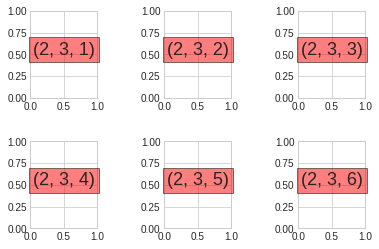

In [21]:
fig  = plt.figure()
fig.subplots_adjust(hspace = 0.5,wspace = 1)
for i in range (1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),
           fontsize = 18,
           horizontalalignment = 'center',
           bbox = dict(facecolor = 'red',
                      alpha = 0.5))

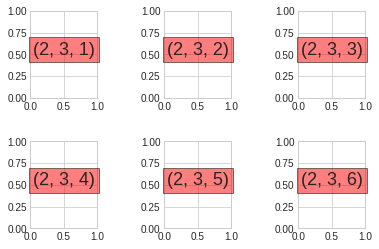

In [24]:
fig  = plt.figure()
fig.subplots_adjust(hspace = 0.5,wspace = 1)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
             fontsize = 18,horizontalalignment = 'center',
             bbox=dict(facecolor = 'red',alpha = 0.5))